In [1]:
# visualizar_datos

import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 🔗 Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["Bank_2025"]
collection = db["prestamos"]

# 📥 Leer los datos desde MongoDB y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))  # Omitimos el campo _id
df = pd.DataFrame(data)

print("✅ Datos cargados desde MongoDB correctamente.")
print(f"📊 Total de registros: {len(df)}\n")

# 􊾆 Crear carpeta para guardar gráficos
reports_path = Path.cwd() / "../docs"
reports_path.mkdir(parents=True, exist_ok=True)

# 􊾆 Vista previa
print("Vista previa de los datos:\n")
print(df.head())


✅ Datos cargados desde MongoDB correctamente.
📊 Total de registros: 1000

Vista previa de los datos:

        Num_Cta Cli_codigo         TipoCuenta    Sucursal FechaApertura  \
0  191-10001-71      C0001      CTA CORRIENTE      Callao    30/04/2010   
1  191-10002-10      C0002  CTA AHORROS SOLES  San Isidro    03/07/2017   
2  191-10003-25      C0003  CTA AHORROS SOLES  Miraflores    11/06/2012   
3  191-10004-94      C0004  CTA AHORROS SOLES      Callao    12/05/2013   
4  191-10005-78      C0005  CTA AHORROS SOLES  San Isidro    03/09/2022   

      Saldo  
0   8788.87  
1    840.70  
2  10527.20  
3   8873.68  
4  13944.09  


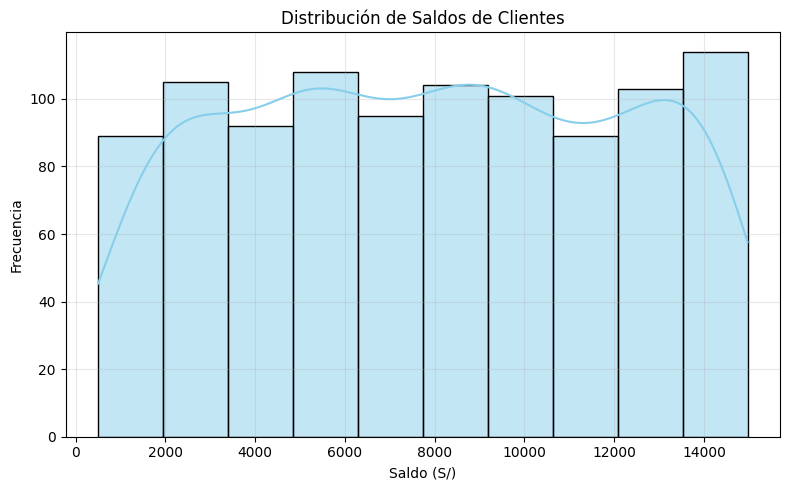

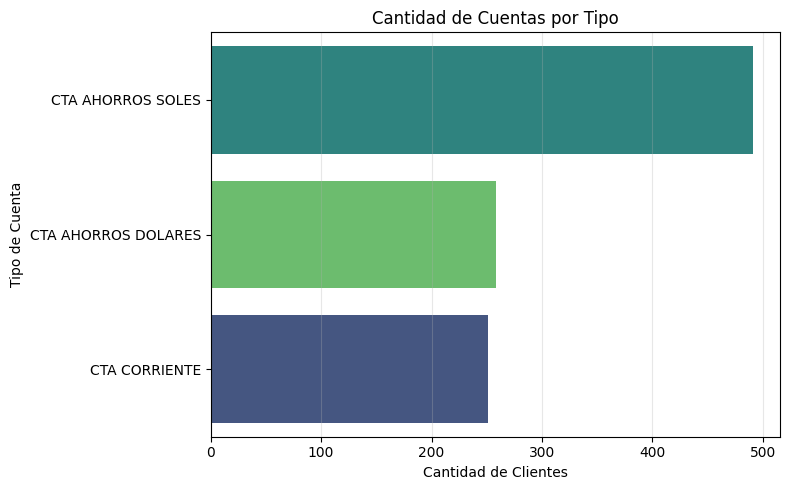

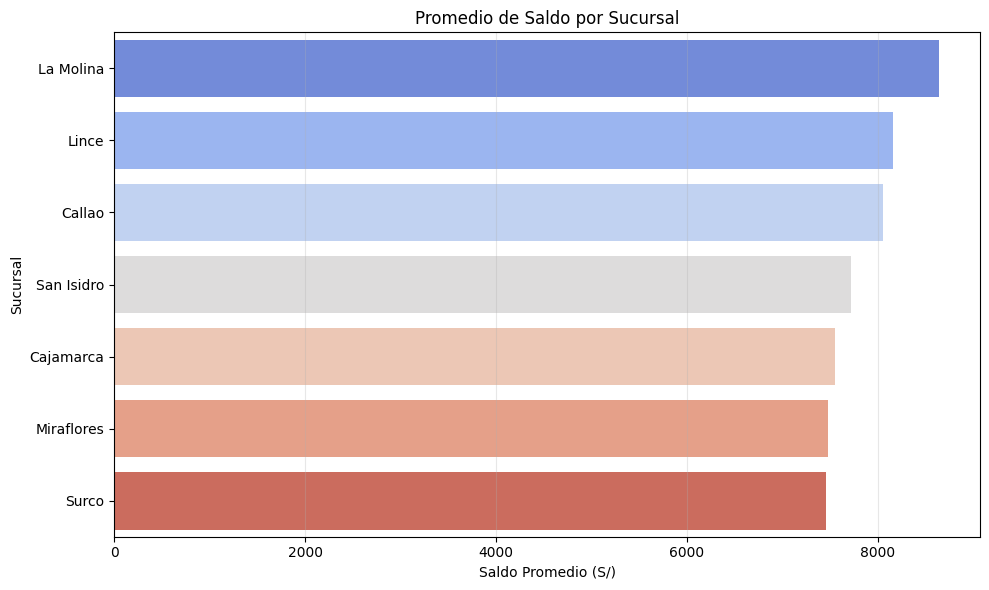


🏆 Top 5 clientes con mayor saldo:
     Cli_codigo     Saldo    Sucursal
279      C0280  14970.42      Callao
882      C0883  14969.97       Lince
863      C0864  14963.75      Callao
622      C0623  14950.40  Miraflores
269      C0270  14923.91  San Isidro


In [2]:
### 1. Distribución de saldos
# Nota: Si hay error, instala las librerías en la consola:
# pip install matplotlib seaborn pandas pymongo

plt.figure(figsize=(8, 5))
sns.histplot(df["Saldo"], bins=10, kde=True, color='skyblue')
plt.title("Distribución de Saldos de Clientes")
plt.xlabel("Saldo (S/)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_saldos.png")
plt.show()


### 2. Cantidad de cuentas por tipo
# En versiones recientes de seaborn, el parámetro "palette" solo debe usarse
# cuando hay una variable categórica asignada a "hue" (es decir, cuando coloreas por una segunda variable).

# 💡 Explicación adicional:
# - hue="TipoCuenta" le dice a seaborn: "colorea cada valor de TipoCuenta con un color distinto".
# - Como ya estás mostrando TipoCuenta en el eje y, la leyenda sería redundante → por eso usamos legend=False.
# - Este es el método oficial para colorear barras por categoría en countplot.

plt.figure(figsize=(8, 5))
sns.countplot(
    y="TipoCuenta",
    hue="TipoCuenta",  # Asigna la misma variable a hue
    data=df,
    order=df["TipoCuenta"].value_counts().index,
    palette="viridis",
    legend=False  # Oculta la leyenda redundante
)
plt.title("Cantidad de Cuentas por Tipo")
plt.xlabel("Cantidad de Clientes")
plt.ylabel("Tipo de Cuenta")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "cuentas_por_tipo.png")
plt.show()


### 3. Promedio de saldo por sucursal
# Para mantener el efecto visual y eliminar advertencias, convierte los datos en un DataFrame
# y usa hue con la variable categórica (en este caso, las sucursales).

# Promedio por sucursal
promedio_sucursal = df.groupby("Sucursal")["Saldo"].mean().sort_values(ascending=False)

# Convertir a DataFrame para compatibilidad con seaborn >=0.14
df_prom = promedio_sucursal.reset_index()
df_prom.columns = ["Sucursal", "PromedioSaldo"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_prom,
    x="PromedioSaldo",
    y="Sucursal",
    hue="Sucursal",
    palette="coolwarm",
    legend=False
)
plt.title("Promedio de Saldo por Sucursal")
plt.xlabel("Saldo Promedio (S/)")
plt.ylabel("Sucursal")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "promedio_saldo_sucursal.png")
plt.show()


### 4. Clientes con mayor saldo (Top 5)
top_clientes = df.nlargest(5, "Saldo")[["Cli_codigo", "Saldo", "Sucursal"]]
print("\n🏆 Top 5 clientes con mayor saldo:\n", top_clientes)
